# Procesamiento de datos empleando Google Colaboratory

Se presenta un breve tutorial empleando la herramienta Google Colaboratory o "Colab" para procesar datos relacionados con la calidad del aire.

Por:

Ferney Amaya Fernández
https://ferneyoamaya.github.io/

# Tutorial de Colab



##1.Instala Colab en tu cuenta de Google

Colab es una herramienta libre de Google y puedes acceder a la aplicación a través de tu cuenta de Google. Para esto realiza lo siguiente:
1. Abre tu cuenta de Google
2. Dirígete a la aplicación Drive
3. Intenta abrir un nuevo documento (con la opción +Nuevo) y dirígete a la opción "Conectar más aplicaciones"
4. Busca Colab e instálala en tu cuenta, acepta los permisos de acceso

Cuando vuelvas a dar la oćión +Nuevo, abre un nuevo cuaderno de Google Colaboratory como este.

Colab tiene dos tipos de celdas: Código y Texto. Las celdas de Texto reciben código en un formato llamado Markdown. En las celdas de Código puedes escribir código en Python.

## 2.Tutorial rápido de Colab: Celdas de Texto

A continuación se presentan ejemplos de formato de las celdas de texto.

**negrita**

_cursiva_ o *cursiva*

~~tachado~~

>Texto tabulado

`ejemplo de código print(a)`

[Enlace a UPB](https://www.upb.edu.co)

Lista no enumerada:
- primer item
- segundo item
- tercer item

Tabla:

|Columna 1|Columna 2|
|---------|---------|
|   A     |    B    |
|   C     |    D    |

Ecuación:

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

En el siguiente enlace se encuentran más formas para codificar texto y ecuaciones:

https://colab.research.google.com/notebooks/markdown_guide.ipynb

## 3.Tutorial rápido de Colab: Celdas de código

Características básicas:
- Se emplea `=` para asignar un valor a una variable.
- Se emplea la función `input()` para permitir que el usuario entre datos.
- Se emplea la función `print()` para presentar información en pantalla.

Ejecutar la siguiente celda:


In [ ]:
var1 = int(input('Entre un número entero: '))
var2 = 10
var3 = var1 + var2
print(var3)

# Procesamiento de datos con la biblioteca Pandas

La biblioteca Pandas para Python permite trabajar analizando y visualizando conjuntos de datos.

Revisa el siguiente enlace donde se encuentra información de esta biblioteca:
https://pandas.pydata.org/

Importa la biblioteca Pandas:

In [ ]:
import pandas as pd

## 1.Cargar datos y explorarlos

Puedes seleccionar un archivo en formato csv, JSON o en excel desde una ubicación en el Internet o desde una ubicación en tu disco local:

Indica la ruta a tu archivo, por ejemplo, en un directorio local:
```Python
path = "/ruta/archivo"
```
Para cargar un archivo csv con los datos separados por punto y coma:
```Python
df = pd.read_csv(path,sep=';',decimal= '.')
```
Para cargar un archivo xslx:
```Python
df = pd.read_excel(path,sheet_name=0)
```
Por ejemplo, a continuación se cargará un archivo desde un sitio en el Internet que se encuentra en formato csv:

In [ ]:
path = "https://raw.githubusercontent.com/FerneyOAmaya/Competencias-Digitales/master/H2020Medellin.csv"
df = pd.read_csv(path , sep=',', decimal='.')
df.head()

Prueba con las siguientes opciones para observar la tabla con los datos descargados:

In [ ]:
df.shape
df.columns
df.describe()
df.tail()
df.head()

Podemos eliminar una columna innecesaria, por ejemplo la columna: "Unnamed: 0"

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

Verifica que la columna se haya eliminado.

## 2.Carga archivos con datos de temperatura, humedad y presión

Carga archivos de con datos de humedad, presión y temperatura en las variables dfH, dfP y dfT respectivamente a partir de las siguientes ubicaciones, completa el código que aparece abajo para que puedas hacerlo.

In [ ]:
pathH = "https://raw.githubusercontent.com/FerneyOAmaya/Competencias-Digitales/master/H2020Medellin.csv"
pathP = "https://raw.githubusercontent.com/FerneyOAmaya/Competencias-Digitales/master/P2020Medellin.csv"
pathT = "https://raw.githubusercontent.com/FerneyOAmaya/Competencias-Digitales/master/T2020Medellin.csv"

Escribe el código para eliminar la columna "Unnamed:0" en cada una de ellas. Verifica y explora las 3 tablas.

Lleva las 3 tablas a una sola. Para hacerlo revisa el siguiente ejemplo: Si quiero unir dos tablas "tabla1" y "tabla" que comparten los nombres de las columnas "var1" y "var2" y generar como resultado una tabla llamada "salida", la forma de hacerlo es la siguiente:

```Python
salida = pd.merge(tabla1, tabla2, on=['var1','var2'])
```

A partir del ejemplo anterior, genere el código que te permita unir en una única tabla, las tablas de humedad, presión y temperatura.

## 3.Obtener valores estadísticos básicos

Puedes obtener valores estadísticos. Por ejemplo, para obtener el valor promedio de la columna "Temperatura", puedes hacerlo de la siguiente forma:

```Python
df['Temperatura'].mean()
```
Se presentan más resultados de la columna "Temperatura"

In [ ]:
print('Conteo:', df['Temperatura'].count())
print('Máximo:', df['Temperatura'].max())
print('Mínimo:', df['Temperatura'].min())
print('Promedio:', df['Temperatura'].mean())
print('Desviación estándar:', df['Temperatura'].std())

Obten las estadísticas básicas de la temperatura, humedad y presión. Encuentra el valor máximo y mínimo de la fecha.

## 4.Graficar el valor de una columna

En esta sección revisaremos dos alternativas para generar gráficos a partir de una tabla. Por ejemplo, si queremos graficar la temperatura:

Alternativa 1: Graficar directamente desde la tabla:

In [ ]:
df['Temperatura'].plot()

Alternativa 2: Graficar directamente desde la tabla indicando las variables a graficar:

In [ ]:
df.plot(x='Fechas',y='Temperatura')

Alternativa 3: Graficar empleando la biblioteca matplotlib.pyplot. En este caso graficamos la temperatura en función de la fecha y debemos previamente ordenar en forma ascendente las fechas.

In [ ]:
import matplotlib.pyplot as plt

df = df.sort_values('Fechas',ascending=True)
plt.plot(df['Fechas'],df['Temperatura'])
plt.title('Temperatura en función de la fecha')
ax = plt.subplot()
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura')

Puede graficarse la temperatura en un gráfico tipo cajas y bigotes. Averigue como se interpreta.

In [ ]:
df['Temperatura'].plot(kind="box")

Generar gráficas para la presión y la humedad.

## 5.Agrupar y ordenar

Por ejemplo, si se quiere obtener el promedio de temperatura por cada estación y posteriormente presentarlo:

In [ ]:
df.groupby(['Estacion'])['Temperatura'].mean()

Estacion
BEL-USBV    21.520074
ITA-CJUS    22.171826
MED-FISC    22.637576
Name: Temperatura, dtype: float64

Puede generarse una gráfica de barras:

<Axes: xlabel='Estacion'>

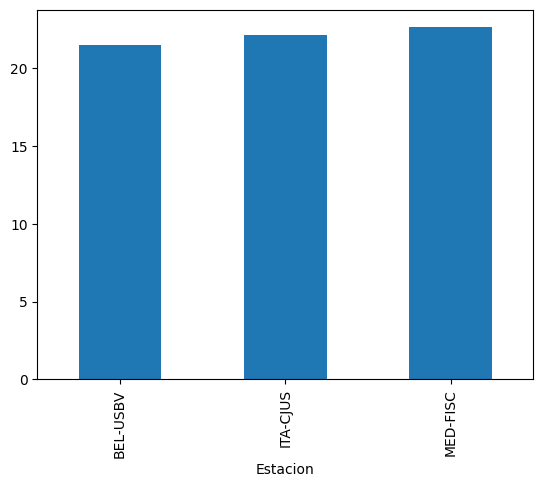

In [ ]:
df.groupby(['Estacion'])['Temperatura'].mean().plot(kind="bar")

## 5. Relación entre variables

Se presentan diferentes formas de observar la relación entre variables:

### Gráfica de dos variables

In [ ]:
plt.plot(df['Temperatura'],df['Presion'])
ax = plt.subplot()
ax.set_xlabel('Temperatura')
ax.set_ylabel('Presion')
plt.show()

¿Cuáles variables se relacionan más? ¿Cómo identificarlo?

### Correlación entre dos variables

In [ ]:
print(df['Temperatura'].corr(df['Presion']))

¿Cuáles variables se relacionan más? ¿Cómo identificarlo?

### Regresión lineal

In [ ]:
muestras = df.shape[0]
x = df['Temperatura'].values.reshape((muestras,1))
y = df['Presion'].values.reshape((muestras,1))

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de regresión lineal
modelo = linear_model.LinearRegression()

# Entrenar el modelo con los datos (X,Y)
modelo.fit(x, y)

# Predecir usando el modelo
y_pred = modelo.predict(x)

# Calcular el error cuadrático medio y el estadístico R^2
print('Error cuadrático medio: ', mean_squared_error(y, y_pred))
print('Estadístico R_2: ', r2_score(y, y_pred))

# Graficar
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()